# Regression

In [10]:
import keras
from keras.datasets import boston_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [12]:
(train_data.shape, train_labels.shape), (test_data.shape, test_labels.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

The data are the different features, total of 13 features each, and the label is the corresponding house price in thousands of dollars

In [13]:
train_data[0], train_labels[0]

(array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]), 15.2)

### The dataset contains 13 different features:

1. Per capita crime rate.
2. The proportion of residential land zoned for lots over 25,000 square feet.
3. The proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. The average number of rooms per dwelling.
7. The proportion of owner-occupied units built before 1940.
8. Weighted distances to five Boston employment centers.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. Percentage lower status of the population.

In [14]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [15]:
train_labels[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

# Normalize the features

In [16]:
mean = train_data.mean()
std  = train_data.std()
train_data = (train_data - mean) / std
test_data  = (test_data  - mean) / std

# Build the Model

In [17]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))
optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

# Fit the Model

In [18]:
history = model.fit(train_data, train_labels, epochs=1000, validation_split=0.2, verbose=1)

Train on 323 samples, validate on 81 samples
Epoch 1/1000
323/323 [==============================] - 1s 2ms/step - loss: 497.8095 - mean_absolute_error: 20.1935 - val_loss: 489.0720 - val_mean_absolute_error: 19.9416
Epoch 2/1000
323/323 [==============================] - 0s 133us/step - loss: 385.7763 - mean_absolute_error: 17.0603 - val_loss: 371.7486 - val_mean_absolute_error: 16.6478
Epoch 3/1000
323/323 [==============================] - 0s 133us/step - loss: 280.8901 - mean_absolute_error: 13.7555 - val_loss: 258.6709 - val_mean_absolute_error: 12.9568
Epoch 4/1000
323/323 [==============================] - 0s 126us/step - loss: 191.9004 - mean_absolute_error: 10.8093 - val_loss: 173.7375 - val_mean_absolute_error: 9.9815
Epoch 5/1000
323/323 [==============================] - 0s 139us/step - loss: 135.0878 - mean_absolute_error: 8.6423 - val_loss: 122.9607 - val_mean_absolute_error: 8.3063
Epoch 6/1000
323/323 [==============================] - 0s 133us/step - loss: 109.3723 - m

323/323 [==============================] - 0s 111us/step - loss: 57.3879 - mean_absolute_error: 5.2014 - val_loss: 69.1999 - val_mean_absolute_error: 5.4363
Epoch 49/1000
323/323 [==============================] - 0s 111us/step - loss: 56.9856 - mean_absolute_error: 5.1087 - val_loss: 67.5989 - val_mean_absolute_error: 5.9164
Epoch 50/1000
323/323 [==============================] - 0s 114us/step - loss: 58.4250 - mean_absolute_error: 5.3660 - val_loss: 69.0304 - val_mean_absolute_error: 5.4089
Epoch 51/1000
323/323 [==============================] - 0s 104us/step - loss: 56.7957 - mean_absolute_error: 5.1569 - val_loss: 69.4789 - val_mean_absolute_error: 5.4092
Epoch 52/1000
323/323 [==============================] - 0s 108us/step - loss: 56.9252 - mean_absolute_error: 5.1188 - val_loss: 70.5456 - val_mean_absolute_error: 5.3625
Epoch 53/1000
323/323 [==============================] - 0s 105us/step - loss: 57.3256 - mean_absolute_error: 5.1941 - val_loss: 72.1470 - val_mean_absolute_er

323/323 [==============================] - 0s 117us/step - loss: 53.9491 - mean_absolute_error: 5.0237 - val_loss: 70.5895 - val_mean_absolute_error: 5.1754
Epoch 96/1000
323/323 [==============================] - 0s 124us/step - loss: 54.3862 - mean_absolute_error: 4.8641 - val_loss: 69.7227 - val_mean_absolute_error: 5.1570
Epoch 97/1000
323/323 [==============================] - 0s 108us/step - loss: 53.7564 - mean_absolute_error: 4.8220 - val_loss: 71.2989 - val_mean_absolute_error: 5.1866
Epoch 98/1000
323/323 [==============================] - 0s 120us/step - loss: 53.1072 - mean_absolute_error: 4.8321 - val_loss: 68.6818 - val_mean_absolute_error: 5.1496
Epoch 99/1000
323/323 [==============================] - 0s 117us/step - loss: 54.0077 - mean_absolute_error: 4.9110 - val_loss: 71.4998 - val_mean_absolute_error: 5.1726
Epoch 100/1000
323/323 [==============================] - 0s 117us/step - loss: 53.8749 - mean_absolute_error: 4.8776 - val_loss: 66.3387 - val_mean_absolute_e

323/323 [==============================] - 0s 124us/step - loss: 51.7307 - mean_absolute_error: 4.5650 - val_loss: 62.4478 - val_mean_absolute_error: 5.0988
Epoch 143/1000
323/323 [==============================] - 0s 108us/step - loss: 51.3203 - mean_absolute_error: 4.7474 - val_loss: 61.3931 - val_mean_absolute_error: 5.2122
Epoch 144/1000
323/323 [==============================] - 0s 105us/step - loss: 50.5295 - mean_absolute_error: 4.7503 - val_loss: 64.7392 - val_mean_absolute_error: 5.0380
Epoch 145/1000
323/323 [==============================] - 0s 108us/step - loss: 49.9355 - mean_absolute_error: 4.8111 - val_loss: 79.9339 - val_mean_absolute_error: 5.5826
Epoch 146/1000
323/323 [==============================] - 0s 108us/step - loss: 51.8190 - mean_absolute_error: 4.6211 - val_loss: 69.8715 - val_mean_absolute_error: 5.1220
Epoch 147/1000
323/323 [==============================] - 0s 111us/step - loss: 51.3225 - mean_absolute_error: 4.6232 - val_loss: 63.4254 - val_mean_absolu

Epoch 190/1000
323/323 [==============================] - 0s 124us/step - loss: 46.9183 - mean_absolute_error: 4.5234 - val_loss: 57.7207 - val_mean_absolute_error: 5.0247
Epoch 191/1000
323/323 [==============================] - 0s 114us/step - loss: 47.4076 - mean_absolute_error: 4.6831 - val_loss: 75.6845 - val_mean_absolute_error: 5.4716
Epoch 192/1000
323/323 [==============================] - 0s 105us/step - loss: 48.6618 - mean_absolute_error: 4.5481 - val_loss: 64.9096 - val_mean_absolute_error: 4.9673
Epoch 193/1000
323/323 [==============================] - 0s 102us/step - loss: 47.2599 - mean_absolute_error: 4.5277 - val_loss: 57.2951 - val_mean_absolute_error: 5.2969
Epoch 194/1000
323/323 [==============================] - 0s 111us/step - loss: 47.2247 - mean_absolute_error: 4.6681 - val_loss: 61.6175 - val_mean_absolute_error: 4.8880
Epoch 195/1000
323/323 [==============================] - 0s 117us/step - loss: 47.1881 - mean_absolute_error: 4.5417 - val_loss: 58.0422 - 

323/323 [==============================] - 0s 117us/step - loss: 44.4491 - mean_absolute_error: 4.2753 - val_loss: 61.9010 - val_mean_absolute_error: 4.8527
Epoch 238/1000
323/323 [==============================] - 0s 117us/step - loss: 43.0985 - mean_absolute_error: 4.2665 - val_loss: 58.4870 - val_mean_absolute_error: 4.7746
Epoch 239/1000
323/323 [==============================] - 0s 114us/step - loss: 44.3023 - mean_absolute_error: 4.3641 - val_loss: 58.4850 - val_mean_absolute_error: 4.7629
Epoch 240/1000
323/323 [==============================] - 0s 111us/step - loss: 43.3390 - mean_absolute_error: 4.3260 - val_loss: 55.4146 - val_mean_absolute_error: 5.4543
Epoch 241/1000
323/323 [==============================] - 0s 116us/step - loss: 43.7954 - mean_absolute_error: 4.3820 - val_loss: 54.0817 - val_mean_absolute_error: 5.0229
Epoch 242/1000
323/323 [==============================] - 0s 117us/step - loss: 45.0085 - mean_absolute_error: 4.4577 - val_loss: 54.3859 - val_mean_absolu

Epoch 285/1000
323/323 [==============================] - 0s 114us/step - loss: 39.5459 - mean_absolute_error: 4.0617 - val_loss: 53.4650 - val_mean_absolute_error: 4.5853
Epoch 286/1000
323/323 [==============================] - 0s 111us/step - loss: 40.6158 - mean_absolute_error: 4.1842 - val_loss: 61.6193 - val_mean_absolute_error: 4.9216
Epoch 287/1000
323/323 [==============================] - 0s 105us/step - loss: 40.9016 - mean_absolute_error: 4.1378 - val_loss: 51.2176 - val_mean_absolute_error: 5.2698
Epoch 288/1000
323/323 [==============================] - 0s 105us/step - loss: 41.5547 - mean_absolute_error: 4.4144 - val_loss: 53.5381 - val_mean_absolute_error: 5.6503
Epoch 289/1000
323/323 [==============================] - 0s 108us/step - loss: 42.0945 - mean_absolute_error: 4.6108 - val_loss: 52.7132 - val_mean_absolute_error: 4.5663
Epoch 290/1000
323/323 [==============================] - 0s 111us/step - loss: 39.3027 - mean_absolute_error: 4.0503 - val_loss: 50.0591 - 

323/323 [==============================] - 0s 123us/step - loss: 35.7340 - mean_absolute_error: 4.0225 - val_loss: 67.9820 - val_mean_absolute_error: 5.5424
Epoch 333/1000
323/323 [==============================] - 0s 139us/step - loss: 37.8606 - mean_absolute_error: 3.9628 - val_loss: 47.1738 - val_mean_absolute_error: 5.1974
Epoch 334/1000
323/323 [==============================] - 0s 167us/step - loss: 36.9215 - mean_absolute_error: 4.2397 - val_loss: 54.6817 - val_mean_absolute_error: 4.6844
Epoch 335/1000
323/323 [==============================] - 0s 173us/step - loss: 36.7951 - mean_absolute_error: 3.9657 - val_loss: 51.0916 - val_mean_absolute_error: 4.4936
Epoch 336/1000
323/323 [==============================] - 0s 175us/step - loss: 35.3690 - mean_absolute_error: 3.9347 - val_loss: 50.4230 - val_mean_absolute_error: 4.4678
Epoch 337/1000
323/323 [==============================] - 0s 136us/step - loss: 37.3476 - mean_absolute_error: 4.0410 - val_loss: 50.7777 - val_mean_absolu

Epoch 380/1000
323/323 [==============================] - 0s 136us/step - loss: 32.5870 - mean_absolute_error: 3.9461 - val_loss: 49.2386 - val_mean_absolute_error: 4.4792
Epoch 381/1000
323/323 [==============================] - 0s 114us/step - loss: 32.8718 - mean_absolute_error: 3.8470 - val_loss: 48.1654 - val_mean_absolute_error: 5.5507
Epoch 382/1000
323/323 [==============================] - 0s 114us/step - loss: 34.3627 - mean_absolute_error: 4.1501 - val_loss: 51.3650 - val_mean_absolute_error: 4.6341
Epoch 383/1000
323/323 [==============================] - 0s 114us/step - loss: 32.9312 - mean_absolute_error: 3.8408 - val_loss: 48.0918 - val_mean_absolute_error: 4.4531
Epoch 384/1000
323/323 [==============================] - 0s 133us/step - loss: 32.7243 - mean_absolute_error: 3.8645 - val_loss: 54.3800 - val_mean_absolute_error: 4.8155
Epoch 385/1000
323/323 [==============================] - 0s 127us/step - loss: 33.3162 - mean_absolute_error: 3.8240 - val_loss: 51.0671 - 

323/323 [==============================] - 0s 111us/step - loss: 31.9008 - mean_absolute_error: 3.9365 - val_loss: 56.9165 - val_mean_absolute_error: 5.1276
Epoch 428/1000
323/323 [==============================] - 0s 124us/step - loss: 32.2110 - mean_absolute_error: 3.9099 - val_loss: 54.4918 - val_mean_absolute_error: 4.9621
Epoch 429/1000
323/323 [==============================] - 0s 111us/step - loss: 31.1742 - mean_absolute_error: 3.8083 - val_loss: 41.0200 - val_mean_absolute_error: 4.9486
Epoch 430/1000
323/323 [==============================] - 0s 117us/step - loss: 30.2647 - mean_absolute_error: 3.8278 - val_loss: 37.4946 - val_mean_absolute_error: 4.3228
Epoch 431/1000
323/323 [==============================] - 0s 114us/step - loss: 31.5080 - mean_absolute_error: 3.9888 - val_loss: 44.4647 - val_mean_absolute_error: 4.3727
Epoch 432/1000
323/323 [==============================] - 0s 130us/step - loss: 30.7871 - mean_absolute_error: 3.8641 - val_loss: 40.6776 - val_mean_absolu

Epoch 475/1000
323/323 [==============================] - 0s 120us/step - loss: 30.9391 - mean_absolute_error: 3.9790 - val_loss: 46.6893 - val_mean_absolute_error: 4.5753
Epoch 476/1000
323/323 [==============================] - 0s 117us/step - loss: 29.7599 - mean_absolute_error: 3.7397 - val_loss: 41.3854 - val_mean_absolute_error: 5.1062
Epoch 477/1000
323/323 [==============================] - 0s 114us/step - loss: 29.7744 - mean_absolute_error: 3.9710 - val_loss: 49.8589 - val_mean_absolute_error: 4.7721
Epoch 478/1000
323/323 [==============================] - 0s 120us/step - loss: 30.4486 - mean_absolute_error: 3.9135 - val_loss: 45.5750 - val_mean_absolute_error: 4.4967
Epoch 479/1000
323/323 [==============================] - 0s 126us/step - loss: 29.0884 - mean_absolute_error: 3.7200 - val_loss: 53.2935 - val_mean_absolute_error: 4.9696
Epoch 480/1000
323/323 [==============================] - 0s 120us/step - loss: 29.4914 - mean_absolute_error: 3.7205 - val_loss: 48.4051 - 

323/323 [==============================] - 0s 108us/step - loss: 28.6913 - mean_absolute_error: 3.7612 - val_loss: 37.4522 - val_mean_absolute_error: 4.6706
Epoch 523/1000
323/323 [==============================] - 0s 108us/step - loss: 30.8798 - mean_absolute_error: 4.0138 - val_loss: 35.3545 - val_mean_absolute_error: 4.2507
Epoch 524/1000
323/323 [==============================] - 0s 111us/step - loss: 29.5342 - mean_absolute_error: 3.8905 - val_loss: 43.8044 - val_mean_absolute_error: 4.4257
Epoch 525/1000
323/323 [==============================] - 0s 111us/step - loss: 28.4282 - mean_absolute_error: 3.6893 - val_loss: 37.0431 - val_mean_absolute_error: 3.9993
Epoch 526/1000
323/323 [==============================] - 0s 133us/step - loss: 27.7289 - mean_absolute_error: 3.7287 - val_loss: 50.6153 - val_mean_absolute_error: 6.0709
Epoch 527/1000
323/323 [==============================] - 0s 127us/step - loss: 29.4583 - mean_absolute_error: 3.8964 - val_loss: 35.3774 - val_mean_absolu

Epoch 570/1000
323/323 [==============================] - 0s 117us/step - loss: 26.6374 - mean_absolute_error: 3.6527 - val_loss: 50.0727 - val_mean_absolute_error: 5.9813
Epoch 571/1000
323/323 [==============================] - 0s 117us/step - loss: 29.3148 - mean_absolute_error: 3.9338 - val_loss: 33.3701 - val_mean_absolute_error: 4.1052
Epoch 572/1000
323/323 [==============================] - 0s 117us/step - loss: 27.5792 - mean_absolute_error: 3.7497 - val_loss: 33.0865 - val_mean_absolute_error: 4.1103
Epoch 573/1000
323/323 [==============================] - 0s 124us/step - loss: 27.3878 - mean_absolute_error: 3.7916 - val_loss: 33.0709 - val_mean_absolute_error: 4.0110
Epoch 574/1000
323/323 [==============================] - 0s 167us/step - loss: 26.7529 - mean_absolute_error: 3.7263 - val_loss: 37.5809 - val_mean_absolute_error: 4.0664
Epoch 575/1000
323/323 [==============================] - 0s 145us/step - loss: 28.5458 - mean_absolute_error: 3.7669 - val_loss: 37.3558 - 

323/323 [==============================] - 0s 120us/step - loss: 26.1193 - mean_absolute_error: 3.5935 - val_loss: 33.4883 - val_mean_absolute_error: 4.3301
Epoch 618/1000
323/323 [==============================] - 0s 111us/step - loss: 27.6989 - mean_absolute_error: 3.8525 - val_loss: 34.7782 - val_mean_absolute_error: 4.4460
Epoch 619/1000
323/323 [==============================] - 0s 136us/step - loss: 27.5609 - mean_absolute_error: 3.8423 - val_loss: 58.5413 - val_mean_absolute_error: 5.4716
Epoch 620/1000
323/323 [==============================] - 0s 130us/step - loss: 28.4670 - mean_absolute_error: 3.7014 - val_loss: 33.0804 - val_mean_absolute_error: 4.1740
Epoch 621/1000
323/323 [==============================] - 0s 117us/step - loss: 25.6303 - mean_absolute_error: 3.6731 - val_loss: 62.7625 - val_mean_absolute_error: 5.8010
Epoch 622/1000
323/323 [==============================] - 0s 127us/step - loss: 27.5188 - mean_absolute_error: 3.7095 - val_loss: 41.2121 - val_mean_absolu

Epoch 665/1000
323/323 [==============================] - 0s 120us/step - loss: 25.5181 - mean_absolute_error: 3.6338 - val_loss: 48.7830 - val_mean_absolute_error: 5.9686
Epoch 666/1000
323/323 [==============================] - 0s 119us/step - loss: 27.0827 - mean_absolute_error: 3.8659 - val_loss: 31.9833 - val_mean_absolute_error: 4.1616
Epoch 667/1000
323/323 [==============================] - 0s 133us/step - loss: 24.9798 - mean_absolute_error: 3.6240 - val_loss: 35.3363 - val_mean_absolute_error: 3.9380
Epoch 668/1000
323/323 [==============================] - 0s 121us/step - loss: 27.3503 - mean_absolute_error: 3.7399 - val_loss: 43.8627 - val_mean_absolute_error: 5.5237
Epoch 669/1000
323/323 [==============================] - 0s 114us/step - loss: 26.5681 - mean_absolute_error: 3.8112 - val_loss: 37.3011 - val_mean_absolute_error: 4.1082
Epoch 670/1000
323/323 [==============================] - 0s 120us/step - loss: 25.8516 - mean_absolute_error: 3.5974 - val_loss: 38.3384 - 

323/323 [==============================] - 0s 124us/step - loss: 26.1282 - mean_absolute_error: 3.6097 - val_loss: 42.5442 - val_mean_absolute_error: 4.4262
Epoch 713/1000
323/323 [==============================] - 0s 124us/step - loss: 24.5431 - mean_absolute_error: 3.5400 - val_loss: 42.2604 - val_mean_absolute_error: 4.3965
Epoch 714/1000
323/323 [==============================] - 0s 123us/step - loss: 25.4372 - mean_absolute_error: 3.6393 - val_loss: 45.3457 - val_mean_absolute_error: 4.5678
Epoch 715/1000
323/323 [==============================] - 0s 114us/step - loss: 28.4695 - mean_absolute_error: 3.8323 - val_loss: 42.4645 - val_mean_absolute_error: 4.4312
Epoch 716/1000
323/323 [==============================] - 0s 120us/step - loss: 24.1694 - mean_absolute_error: 3.5237 - val_loss: 32.2899 - val_mean_absolute_error: 3.9552
Epoch 717/1000
323/323 [==============================] - 0s 114us/step - loss: 25.3129 - mean_absolute_error: 3.5906 - val_loss: 40.4304 - val_mean_absolu

Epoch 760/1000
323/323 [==============================] - 0s 124us/step - loss: 23.8990 - mean_absolute_error: 3.5280 - val_loss: 45.7321 - val_mean_absolute_error: 4.6493
Epoch 761/1000
323/323 [==============================] - 0s 114us/step - loss: 23.8381 - mean_absolute_error: 3.5966 - val_loss: 31.8771 - val_mean_absolute_error: 3.8296
Epoch 762/1000
323/323 [==============================] - 0s 127us/step - loss: 24.5096 - mean_absolute_error: 3.5723 - val_loss: 46.6682 - val_mean_absolute_error: 4.6804
Epoch 763/1000
323/323 [==============================] - 0s 139us/step - loss: 24.0682 - mean_absolute_error: 3.4554 - val_loss: 62.3152 - val_mean_absolute_error: 5.8685
Epoch 764/1000
323/323 [==============================] - 0s 124us/step - loss: 26.0946 - mean_absolute_error: 3.5903 - val_loss: 45.1723 - val_mean_absolute_error: 4.5852
Epoch 765/1000
323/323 [==============================] - 0s 117us/step - loss: 26.2384 - mean_absolute_error: 3.6721 - val_loss: 35.8030 - 

323/323 [==============================] - 0s 117us/step - loss: 24.7591 - mean_absolute_error: 3.5365 - val_loss: 50.3567 - val_mean_absolute_error: 6.1966
Epoch 808/1000
323/323 [==============================] - 0s 141us/step - loss: 24.8135 - mean_absolute_error: 3.6661 - val_loss: 56.6650 - val_mean_absolute_error: 5.4573
Epoch 809/1000
323/323 [==============================] - 0s 105us/step - loss: 25.8238 - mean_absolute_error: 3.5066 - val_loss: 59.2054 - val_mean_absolute_error: 5.6618
Epoch 810/1000
323/323 [==============================] - 0s 114us/step - loss: 25.5629 - mean_absolute_error: 3.5984 - val_loss: 50.0659 - val_mean_absolute_error: 4.9457
Epoch 811/1000
323/323 [==============================] - 0s 114us/step - loss: 25.8249 - mean_absolute_error: 3.5093 - val_loss: 33.6659 - val_mean_absolute_error: 4.5226
Epoch 812/1000
323/323 [==============================] - 0s 114us/step - loss: 24.6784 - mean_absolute_error: 3.6618 - val_loss: 35.2369 - val_mean_absolu

Epoch 855/1000
323/323 [==============================] - 0s 127us/step - loss: 23.9234 - mean_absolute_error: 3.4412 - val_loss: 34.3006 - val_mean_absolute_error: 3.9535
Epoch 856/1000
323/323 [==============================] - 0s 123us/step - loss: 22.3037 - mean_absolute_error: 3.3575 - val_loss: 31.5232 - val_mean_absolute_error: 4.2942
Epoch 857/1000
323/323 [==============================] - 0s 133us/step - loss: 22.8168 - mean_absolute_error: 3.4395 - val_loss: 46.1999 - val_mean_absolute_error: 5.8165
Epoch 858/1000
323/323 [==============================] - 0s 117us/step - loss: 24.1876 - mean_absolute_error: 3.6787 - val_loss: 29.8408 - val_mean_absolute_error: 3.7086
Epoch 859/1000
323/323 [==============================] - 0s 120us/step - loss: 22.7875 - mean_absolute_error: 3.4666 - val_loss: 29.2848 - val_mean_absolute_error: 3.8040
Epoch 860/1000
323/323 [==============================] - 0s 136us/step - loss: 22.6686 - mean_absolute_error: 3.4231 - val_loss: 30.6121 - 

323/323 [==============================] - 0s 125us/step - loss: 21.9081 - mean_absolute_error: 3.3247 - val_loss: 31.0908 - val_mean_absolute_error: 4.3626
Epoch 903/1000
323/323 [==============================] - 0s 117us/step - loss: 22.5207 - mean_absolute_error: 3.4738 - val_loss: 27.9083 - val_mean_absolute_error: 3.6626
Epoch 904/1000
323/323 [==============================] - 0s 122us/step - loss: 22.0955 - mean_absolute_error: 3.3889 - val_loss: 44.1742 - val_mean_absolute_error: 5.7054
Epoch 905/1000
323/323 [==============================] - 0s 120us/step - loss: 24.0956 - mean_absolute_error: 3.6105 - val_loss: 42.6465 - val_mean_absolute_error: 4.5080
Epoch 906/1000
323/323 [==============================] - 0s 123us/step - loss: 22.5241 - mean_absolute_error: 3.4248 - val_loss: 63.1275 - val_mean_absolute_error: 7.0371
Epoch 907/1000
323/323 [==============================] - 0s 114us/step - loss: 26.3837 - mean_absolute_error: 3.7737 - val_loss: 34.3838 - val_mean_absolu

Epoch 950/1000
323/323 [==============================] - 0s 117us/step - loss: 22.0879 - mean_absolute_error: 3.4073 - val_loss: 30.3117 - val_mean_absolute_error: 3.7639
Epoch 951/1000
323/323 [==============================] - 0s 131us/step - loss: 22.0550 - mean_absolute_error: 3.3880 - val_loss: 27.3271 - val_mean_absolute_error: 3.8081
Epoch 952/1000
323/323 [==============================] - 0s 123us/step - loss: 21.8655 - mean_absolute_error: 3.4820 - val_loss: 50.1917 - val_mean_absolute_error: 6.1733
Epoch 953/1000
323/323 [==============================] - 0s 108us/step - loss: 23.8731 - mean_absolute_error: 3.5890 - val_loss: 47.2877 - val_mean_absolute_error: 4.8814
Epoch 954/1000
323/323 [==============================] - 0s 114us/step - loss: 22.6013 - mean_absolute_error: 3.4017 - val_loss: 40.1813 - val_mean_absolute_error: 5.3330
Epoch 955/1000
323/323 [==============================] - 0s 120us/step - loss: 22.8557 - mean_absolute_error: 3.5246 - val_loss: 28.9548 - 

323/323 [==============================] - 0s 120us/step - loss: 20.2166 - mean_absolute_error: 3.3556 - val_loss: 26.7154 - val_mean_absolute_error: 3.7115
Epoch 998/1000
323/323 [==============================] - 0s 111us/step - loss: 21.5315 - mean_absolute_error: 3.3384 - val_loss: 29.7420 - val_mean_absolute_error: 4.2832
Epoch 999/1000
323/323 [==============================] - 0s 111us/step - loss: 21.6277 - mean_absolute_error: 3.3646 - val_loss: 36.3104 - val_mean_absolute_error: 4.1214
Epoch 1000/1000
323/323 [==============================] - 0s 108us/step - loss: 21.4238 - mean_absolute_error: 3.2792 - val_loss: 40.2721 - val_mean_absolute_error: 5.2969


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [20]:
loss, mae = model.evaluate(test_data, test_labels, verbose=1)
print('Loss\t\t: {0}\n Mean-Abs-Error\t: {1}'.format(loss, mae))
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

102/102 [==============================] - 0s 59us/step
Loss		: 45.194184546377144
 Mean-Abs-Error	: 5.508651882994409
Testing set Mean Abs Error: $5508.65


(0, 5)

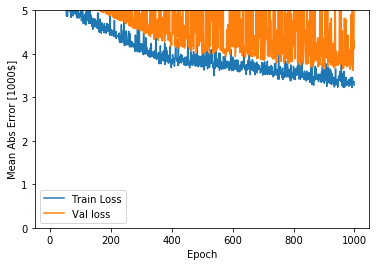

In [21]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [1000$]')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
plt.legend()
plt.ylim([0, 5])

# Predict

In [ ]:
test_predictions = model.predict(test_data).flatten()

In [ ]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values in [$1000]')
plt.ylabel('Predicted Values in [$1000]')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100],[-100, 100])
plt.show()

In [ ]:
error = test_labels - test_predictions
plt.hist(error, bins=50)
plt.xlabel('Prediction Error in [$1000]')
plt.ylabel('Count')
plt.show()

# Saving the Model

In [22]:
model.save('boston_price.model')

In [23]:
old_model = keras.models.load_model('boston_price.model')
old_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
